<a href="https://colab.research.google.com/github/vivek-pathania/Gender-estimation/blob/master/Gender__Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive  #importing (testing_data,training_data)*.npy files from drive to use in google colab
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive"

In [2]:
import numpy as np  #standard imports
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [3]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt

In [4]:
# loading data from drive to colab 

testing_data=np.load('/content/gdrive/My Drive/testing_data.npy',allow_pickle=True,)
training_data=np.load('/content/gdrive/My Drive/training_data.npy',allow_pickle=True)

In [5]:
testing_data.shape

(20267, 2)

In [6]:
training_data[0]

array([array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8),
       0], dtype=object)

In [7]:
#converting the training_data into image_train to (20328, 80, 80, 1) and label_test into (20328, 2) shape.

image_train=[]
label_train=[]
IMG_SIZE=80

for features,label in training_data:
  image_train.append(features)
  label_train.append(label)

image_train=np.array(image_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
label_train=np.array(label_train,dtype='int32')


from keras.utils import to_categorical
label_train = to_categorical(label_train)

In [8]:
#converting the testing_data into image_test to (20328, 80, 80, 1) and label_test into (20328, 2) shape.

image_test=[]
label_test=[]
IMG_SIZE=80


for features,label in testing_data:
  image_test.append(features)
  label_test.append(label)

image_test=np.array(image_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
label_test=np.array(label_test,dtype='int32')


from keras.utils import to_categorical
label_test = to_categorical(label_test)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(80,80,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.8))
model.add(Dense(2, activation='softmax')) 

opt=Adam(lr=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 78, 78, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0

In [12]:
hisory=model.fit(image_train,label_train,epochs=10,validation_split=0.1)

Epoch 1/10
572/572 [==============================] - 288s 504ms/step - loss: 1.0543 - accuracy: 0.6989 - val_loss: 0.5035 - val_accuracy: 0.8569
Epoch 2/10
572/572 [==============================] - 278s 487ms/step - loss: 0.6154 - accuracy: 0.8257 - val_loss: 0.4636 - val_accuracy: 0.8711
Epoch 3/10
572/572 [==============================] - 277s 485ms/step - loss: 0.4602 - accuracy: 0.8611 - val_loss: 0.5370 - val_accuracy: 0.8490
Epoch 4/10
572/572 [==============================] - 265s 463ms/step - loss: 0.3871 - accuracy: 0.8747 - val_loss: 0.4741 - val_accuracy: 0.8623
Epoch 5/10
572/572 [==============================] - 266s 464ms/step - loss: 0.3211 - accuracy: 0.8917 - val_loss: 0.3215 - val_accuracy: 0.8962
Epoch 6/10
572/572 [==============================] - 272s 476ms/step - loss: 0.2950 - accuracy: 0.8932 - val_loss: 0.2336 - val_accuracy: 0.9183
Epoch 7/10
572/572 [==============================] - 267s 466ms/step - loss: 0.2584 - accuracy: 0.9010 - val_loss: 0.2255 -

In [13]:
test_loss, test_acc = model.evaluate(image_test,label_test, verbose=2)
print(test_acc)

634/634 - 62s - loss: 0.2256 - accuracy: 0.9143
0.914343535900116


In [14]:
model.save("/content/gdrive/My Drive/Colab Notebooks/male_female_mark2.h5") 
!ls "/content/gdrive/My Drive/Colab Notebooks" 
new_model = tf.keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/male_female_mark2.h5')

'Copy of Copy of running_model.ipynb'   Untitled10.ipynb
 data_1.ipynb			        Untitled1.ipynb
'flask project.ipynb'		        Untitled2.ipynb
'Gender _Estimation.ipynb'	        Untitled3.ipynb
 lannet_assignment.ipynb	        Untitled4.ipynb
'lannet _rough.ipynb'		        Untitled5.ipynb
 Male_Female.ipynb		        Untitled6.ipynb
 male_female_mark2.h5		        Untitled7.ipynb
 male_female_mark2.hdf5		        Untitled8.ipynb
 Untitled0.ipynb		        Untitled9.ipynb


In [15]:
#function to create the truth table based on predictions and the true value provided in the dataset

def truth_table(model,dataset):
  male_true=0
  female_true=0
  male_pred=0
  female_pred=0
  for image,correct_label in dataset:
    class_names = ['female','male']
    image1=np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    prediction = model.predict(image1)
    predicted_class = class_names[np.argmax(prediction)]

    if predicted_class == 'male':
      if predicted_class == class_names[correct_label]:
        male_true += 1
      else:
        male_pred += 1

    if predicted_class == 'female':
      if predicted_class == class_names[correct_label]:
        female_true += 1
      else:
        female_pred += 1
  
  
  dframe = DataFrame([[male_true,male_pred,male_true+male_pred],
                      [female_pred,female_true,female_true+female_pred],
                      [male_true+female_pred,male_pred+female_true,male_true+male_pred+female_true+female_pred]],
                    index=['male','female','Total'],
                     columns=['male','female','Total'])
  dframe.index.names = ['Predicted']
  dframe.columns.names = ['Groung Truth--->']
  return dframe
    

In [17]:
truth_table(new_model,testing_data)

Groung Truth--->,male,female,Total
Predicted,,,
male,9780,1664,11444
female,72,8751,8823
Total,9852,10415,20267


In [18]:
#function to predict the gender of the given image 

def predict(model, image, correct_label):
  class_names = ['female','male']

  image1=np.array(image).reshape(-1,IMG_SIZE,IMG_SIZE,1)
  prediction = model.predict(image1)
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img,cmap='gray')
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

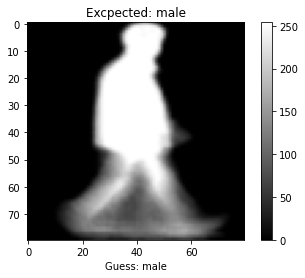

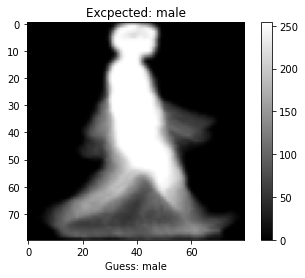

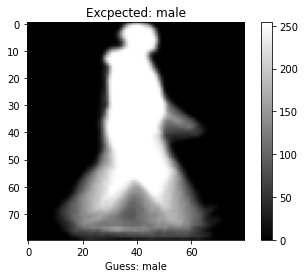

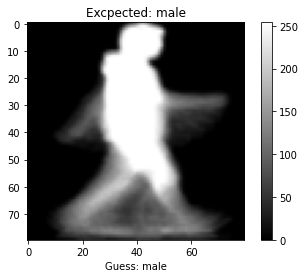

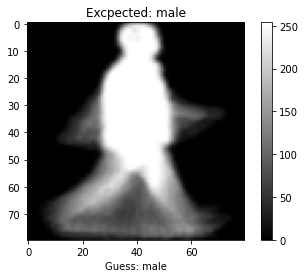

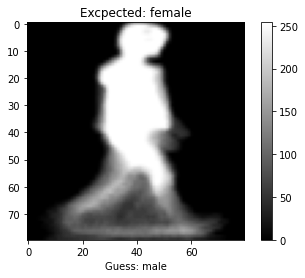

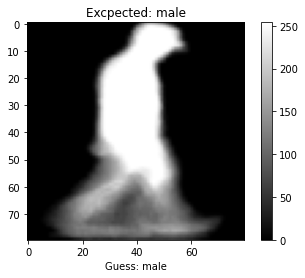

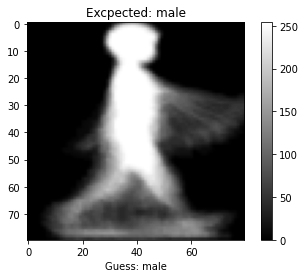

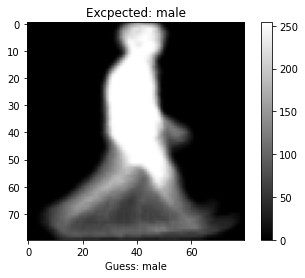

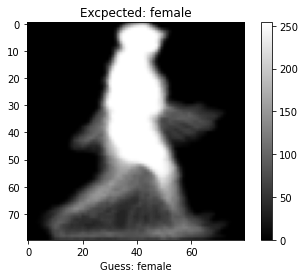

In [19]:
for image,label in testing_data[0:10]:
  
  predict(new_model,image=image,correct_label=label)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


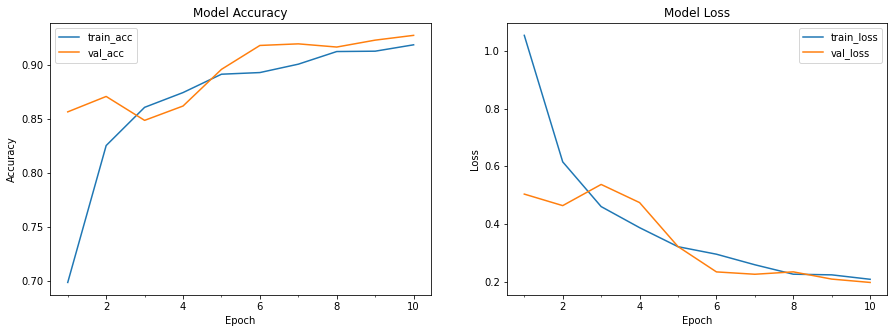

In [29]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train_acc', 'val_acc'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train_loss', 'val_loss'], loc='best')
    plt.show()
    
plot_model_history(hisory)

In [ ]:
|